In [1]:
from requests import get
from bs4 import BeautifulSoup
import os
import re
import acquire, prepare
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix

In [2]:
#url = 'https://github.com/topics/awesome'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [3]:
#soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
#repo = soup.find_all('h3', class_='f3 color-text-secondary text-normal lh-condensed')

In [5]:
#repo

In [6]:
#repo = soup.find_all('a', class_='text-bold')

In [7]:
#[i['href'] for i in repo]

In [8]:
#url = 'https://github.com/topics/awesome?l=javascript'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [9]:
#soup = BeautifulSoup(response.text, 'html.parser')

In [10]:
#repo = soup.find_all('a', class_ = 'text-bold')

In [11]:
#js = [i['href'] for i in repo]

In [12]:
#js

In [13]:
#url = 'https://github.com/topics/awesome?l=python'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [14]:
#soup = BeautifulSoup(response.text, 'html.parser')
#repo = soup.find_all('a', class_ = 'text-bold')

In [15]:
#py = [i['href'] for i in repo]

In [16]:
#py

In [17]:
#url = 'https://github.com/topics/awesome?l=html'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [18]:
#soup = BeautifulSoup(response.text, 'html.parser')
#repo = soup.find_all('a', class_ = 'text-bold')

In [19]:
#html = [i['href'] for i in repo]

In [20]:
#html

In [21]:
#url = 'https://github.com/topics/awesome?l=shell'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [22]:
#soup = BeautifulSoup(response.text, 'html.parser')
#repo = soup.find_all('a', class_ = 'text-bold')

In [23]:
#shell = [i['href'] for i in repo]

In [24]:
#shell

In [25]:
#repos = [js + py + html + shell]

In [26]:
#repos = repos[0]

In [27]:
#repos

In [28]:
#pd.DataFrame(acquire.scrape_github_data())

In [29]:
repo_df = acquire.get_github_data(cached = True)

In [30]:
repo_df

,repo,language,readme_contents
0,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...
1,/jaywcjlove/awesome-mac,JavaScript,Awesome Mac\n----\n<!--rehype:style=font-size:...
2,/goabstract/Awesome-Design-Tools,JavaScript,"<div class=""hidden-in-page"">\n\n# Awesome Desi..."
3,/viatsko/awesome-vscode,JavaScript,"\n<br/>\n<div align=""center"">\n <img width=""3..."
4,/ascoders/weekly,JavaScript,"# 前端精读\n\n<a href=""https://travis-ci.org/ascod..."
...,...,...,...
115,/buren/awesome-sweden,Shell,# Sweden [![awesome](https://awesome.re/badge-...
116,/jeffreytse/jekyll-deploy-action,Shell,"<div align=""center"">\n <br>\n\n <a href=""htt..."
117,/tajmone/awesome-interactive-fiction,Shell,= Awesome Interactive Fiction link:https://awe...
118,/stve/awesome-dropwizard,Shell,# Awesome Dropwizard [![Awesome](https://cdn.r...


In [31]:
from markdown import markdown

In [32]:
repo_df

,repo,language,readme_contents
0,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...
1,/jaywcjlove/awesome-mac,JavaScript,Awesome Mac\n----\n<!--rehype:style=font-size:...
2,/goabstract/Awesome-Design-Tools,JavaScript,"<div class=""hidden-in-page"">\n\n# Awesome Desi..."
3,/viatsko/awesome-vscode,JavaScript,"\n<br/>\n<div align=""center"">\n <img width=""3..."
4,/ascoders/weekly,JavaScript,"# 前端精读\n\n<a href=""https://travis-ci.org/ascod..."
...,...,...,...
115,/buren/awesome-sweden,Shell,# Sweden [![awesome](https://awesome.re/badge-...
116,/jeffreytse/jekyll-deploy-action,Shell,"<div align=""center"">\n <br>\n\n <a href=""htt..."
117,/tajmone/awesome-interactive-fiction,Shell,= Awesome Interactive Fiction link:https://awe...
118,/stve/awesome-dropwizard,Shell,# Awesome Dropwizard [![Awesome](https://cdn.r...


In [33]:
repo_df = repo_df.drop(labels=[1,4,12,18,19,28,31,44,54,67,68,72,74,79,81,87,95], axis=0)

In [34]:
print(repo_df.iloc[35:36])

                     repo language  \
42  /rossant/awesome-math   Python   

                                      readme_contents  
42  # Awesome Math [![Awesome](https://cdn.rawgit....  


In [35]:
repo_df = repo_df.dropna()

In [36]:
repo_df.shape

(102, 3)

In [303]:
repo_clean = prepare.prep_article_data(repo_df, 'readme_contents', extra_words = ['fr','freesvghttpsgithubcomlisadziubaawesomedesigntoolsblobmastermediafreesvg','opensourcesvghttpsgithubcomlisadziubaawesomedesigntoolsblobmastermediaopensourcesvg'])

In [38]:
repo_clean.head(10)

,repo,language,readme_contents,cleaned_readme_contents,stemmed_readme_contents,lemmatized_readme_contents
0,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...,awesomeselfhosted selfhosting practice locally...,awesomeselfhost selfhost practic local host ma...,awesomeselfhosted selfhosting practice locally...
2,/goabstract/Awesome-Design-Tools,JavaScript,"<div class=""hidden-in-page"">\n\n# Awesome Desi...",awesome design tools awesome design pluginshtt...,awesom design tool awesom design pluginshttpsg...,awesome design tool awesome design pluginshttp...
3,/viatsko/awesome-vscode,JavaScript,"\n<br/>\n<div align=""center"">\n <img width=""3...",curated list delightful visual studio codehttp...,curat list delight visual studio codehttpscode...,curated list delightful visual studio codehttp...
5,/davidsonfellipe/awesome-wpo,JavaScript,# Awesome WPO [![Awesome](https://cdn.rawgit.c...,awesome wpo curated list web performance optim...,awesom wpo curat list web perform optim everyo...,awesome wpo curated list web performance optim...
6,/shekhargulati/52-technologies-in-2016,JavaScript,\n52 technologies in 2016 [![GitHub Stats](htt...,52 technologies 2016 taken challenge learn new...,52 technolog 2016 taken challeng learn new tec...,52 technology 2016 taken challenge learn new t...
7,/hackerkid/Mind-Expanding-Books,JavaScript,"# Mind Expanding Books\n\n\n<h2 align=""center...",mind expanding books check latest project diff...,mind expand book check latest project diffblog...,mind expanding book check latest project diffb...
8,/apsdehal/awesome-ctf,JavaScript,# Awesome CTF [![Build Status](https://travis-...,awesome ctf curated list capture flag ctf fram...,awesom ctf curat list captur flag ctf framewor...,awesome ctf curated list capture flag ctf fram...
9,/imfunniee/gitfolio,JavaScript,"<img src=""https://i.imgur.com/eA6clZr.png"">\n\...",gitfolio personal website blog every github us...,gitfolio person websit blog everi github user ...,gitfolio personal website blog every github us...
10,/Kristories/awesome-guidelines,JavaScript,"<p align=""center"">\n <img alt=""Awesome Guid...",awesome guidelines set guidelines specific pro...,awesom guidelin set guidelin specif program la...,awesome guideline set guideline specific progr...
11,/swapagarwal/swag-for-dev,JavaScript,# swag-for-dev\n\n[![Build Status](https://git...,swagfordev developer nothing piques interest d...,swagfordev develop noth piqu interest develop ...,swagfordev developer nothing pique interest de...


In [39]:
#soup = BeautifulSoup(repo_clean.readme_contents.iloc[35])

In [40]:
#def remove_html(value):
#    html = markdown(value)
#    html = re.sub(r'<pre>(.*?)</pre>', ' ', html)
#    html = re.sub(r'<code>(.*?)</code >', ' ', html)
#    soup = BeautifulSoup(html, "html.parser")
#    text = ''.join(soup.findAll(text=True))
#    text = text.strip().replace('\n', ' ')
#    return text

In [41]:
#def remove_all_html(df):
    #Apply remove_html to each cell in the column. Maybe iterate? Need to figure out how to use .loc for it
    # Then we need to replace each value in the cell with markdown removed
    # return the cleaned df.
#    return df

In [42]:
#remove_html(repo_clean.readme_contents.iloc[35])

In [43]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [44]:
train, validate, test = train_validate_test_split(repo_clean, 'language')

In [45]:
train

,repo,language,readme_contents,cleaned_readme_contents,stemmed_readme_contents,lemmatized_readme_contents
86,/ayr-ton/awesome-geek-podcasts,HTML,---\ntitle: Awesome Geek Podcasts\npermalink: ...,title awesome geek podcasts permalink awesome ...,titl awesom geek podcast permalink awesom geek...,title awesome geek podcasts permalink awesome ...
61,/terkelg/awesome-creative-coding,HTML,# Awesome Creative Coding [![Awesome](https://...,awesome creative coding carefully curated list...,awesom creativ code care curat list awesom cre...,awesome creative coding carefully curated list...
73,/ITI/ICS-Security-Tools,HTML,"# ICS Security Tools, Tips, and Trade\n\nDevel...",ics security tools tips trade developed commun...,ic secur tool tip trade develop commun asset t...,ic security tool tip trade developed community...
112,/calee0219/awesome-5g,Shell,# Awesome 5G [![Awesome](https://raw.githubuse...,awesome 5g curated list awesome 5g frameworks ...,awesom 5g curat list awesom 5g framework libra...,awesome 5g curated list awesome 5g framework l...
43,/0xInfection/Awesome-WAF,Python,# Awesome WAF [![Awesome](https://cdn.rawgit.c...,awesome waf everything web application firewal...,awesom waf everyth web applic firewal waf fore...,awesome waf everything web application firewal...
52,/springload/awesome-wagtail,Python,Awesome Wagtail [![Awesome](https://cdn.rawgit...,awesome wagtail curated list awesome packages ...,awesom wagtail curat list awesom packag articl...,awesome wagtail curated list awesome package a...
53,/ml-tooling/best-of-web-python,Python,"<!-- markdownlint-disable -->\n<h1 align=""cent...",markdownlintdisable bestof web development pyt...,markdownlintdis bestof web develop python rank...,markdownlintdisable bestof web development pyt...
17,/stefanbuck/awesome-browser-extensions-for-github,JavaScript,# Awesome browser extensions for GitHub [![Awe...,awesome browser extensions github numbers upda...,awesom browser extens github number updat dail...,awesome browser extension github number update...
115,/buren/awesome-sweden,Shell,# Sweden [![awesome](https://awesome.re/badge-...,sweden list curated list awesome things use co...,sweden list curat list awesom thing use code s...,sweden list curated list awesome thing use cod...
103,/ashishb/osx-and-ios-security-awesome,Shell,# macOS and iOS Security Related Tools [![Awes...,macos ios security related tools contents maco...,maco io secur relat tool content maco secur io...,macos io security related tool content macos s...


In [46]:
train.language.value_counts()

Shell         16
Python        15
JavaScript    13
HTML          12
Name: language, dtype: int64

In [47]:
all_words = ' '.join(train.cleaned_readme_contents)

In [48]:
pd.Series(data = all_words.split()).value_counts().head(30)

git         1671
open        1522
install     1513
clone       1132
month       1084
pip         1061
ago         1003
years        945
code         670
web          660
data         635
python       609
mit          600
using        575
source       546
theme        507
library      503
2            491
0            486
c            485
tool         469
1            466
use          461
2017         452
3            449
tools        443
language     442
design       421
free         408
plugin       400
dtype: int64

In [49]:
py_words = ' '.join(train[train['language'] == 'Python'].cleaned_readme_contents)

In [50]:
pd.Series(py_words.split()).value_counts().head(30)

install       1453
open          1164
git           1118
clone         1110
month         1073
pip           1058
ago           1000
years          911
mit            594
0              480
python         467
c              404
1              384
apache2        383
library        380
conda          372
2              358
condaforge     356
3              348
wagtail        334
language       313
8              309
6              304
bsd3           292
channels       279
english        276
4              275
notable        274
9              267
10             258
dtype: int64

In [51]:
shell_words = ' '.join(train[train['language'] == 'Shell'].cleaned_readme_contents)

In [52]:
pd.Series(shell_words.split()).value_counts().head(30)

git            516
2017           423
theme          406
zsh            371
status         325
2018           307
web            287
command        276
plugin         271
airflow        268
includes       264
decorations    249
using          237
linux          227
best           227
list           226
time           217
code           214
tools          210
de             206
free           203
use            199
data           197
open           196
based          195
news           191
weekly         185
online         183
software       180
simple         170
dtype: int64

In [53]:
js_words = ' '.join(train[train['language'] == 'JavaScript'].cleaned_readme_contents)

In [54]:
pd.Series(js_words.split()).value_counts().head(30)

covid19        280
code           256
design         225
coronavirus    164
free           162
tool           159
data           152
tools          134
use            129
create         121
app            112
guide          110
source         105
web            102
small          100
food            98
style           98
letter          97
github          92
color           91
world           90
get             89
greek           86
new             86
using           84
climate         84
used            80
unicode         80
people          76
extension       76
dtype: int64

In [55]:
html_words = ' '.join(train[train['language'] == 'HTML'].cleaned_readme_contents)

In [56]:
pd.Series(html_words.split()).value_counts().head(30)

kubernetes     241
webpack        232
podcast        226
hugo           157
source         154
ipfs           142
maintainer     135
loader         105
open            91
using           90
web             89
wardley         82
de              81
plugin          73
software        72
data            71
service         70
development     69
creative        66
mapping         64
distributed     64
tool            64
webgl           64
platform        64
code            64
coding          62
programming     61
cloud           61
developers      53
javascript      49
dtype: int64

In [305]:
all_words = (' '.join(train.cleaned_readme_contents))
java_words = (' '.join(train[train.language == 'JavaScript'].cleaned_readme_contents))
shell_words = (' '.join(train[train.language == 'Shell'].cleaned_readme_contents))
python_words = (' '.join(train[train.language == 'Python'].cleaned_readme_contents))
html_words = (' '.join(train[train.language == 'HTML'].cleaned_readme_contents))
all_freq = pd.Series(all_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
shell_freq = pd.Series(shell_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()

In [307]:
freq_df = pd.concat([java_freq, shell_freq, python_freq, html_freq, all_freq], axis=1).fillna(0).astype(int)
freq_df.columns = ['java', 'shell', 'python', 'html', 'all']
freq_df

,java,shell,python,html,all
covid19,280,3,0,1,284
code,256,214,136,64,670
design,225,120,28,48,421
coronavirus,164,0,0,0,164
free,162,203,19,24,408
...,...,...,...,...,...
kubectltree,0,0,0,1,1
elixirlang,0,0,0,1,1
krane,0,0,0,1,1
rasterization,0,0,0,1,1


In [318]:
parker = freq_df.sort_values(by='all', ascending=False)

In [348]:
parker[(parker['java']/parker['all']) >= .8].index

Index(['covid19', 'coronavirus', 'food', 'letter', 'climate', 'greek',
       'energy', 'ctf', 'u03b9', 'carbon',
       ...
       'ua6a0', 'ita', 'threaded', 'hal', 'bettercap', 'koponen', 'foodtech',
       '1964', 'letterlike', 'yudkowsky'],
      dtype='object', length=6629)

In [539]:
java_ = pd.Series(parker[(parker['java']/parker['all']) >= .6].index)
shell_ = pd.Series(parker[(parker['shell']/parker['all']) >= .6].index)
python_ = pd.Series(parker[(parker['python']/parker['all']) >= .6].index)
html_ = pd.Series(parker[(parker['html']/parker['all']) >= .6].index)

In [540]:
important_words = pd.concat([java_,shell_, python_, html_])

In [541]:
def unique(list_):
    unique_list = []
    for x in list_:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [542]:
uniquewords = unique(important_words)

In [543]:
print(uniquewords)

['covid19', 'coronavirus', 'color', 'small', 'style', 'update', 'food', 'letter', 'unicode', 'climate', 'greek', 'character', 'characters', 'icons', 'dashboard', 'energy', 'products', 'studio', 'installs', 'ctf', 'u03b9', 'cases', 'carbon', 'designers', 'stars', 'global', 'macsvghttpsgithubcomlisadziubaawesomedesigntoolsblobmastermediamacsvg', 'guidelines', 'water', 'tracker', 'statistics', 'waste', 'p', 'challenges', 'impact', 'stock', 'health', 'green', 'photos', 'planet', 'published', 'author', 'vector', 'icon', 'emoji', 'footprint', 'description', 'vue', 'stats', 'reduce', 'sketch', 'novel', 'materials', 'capital', 'ypogegrammeni', 'emissions', 'crisis', 'solar', 'trees', 'travel', 'standards', 'symbols', 'buy', 'vscode', 'rating', 'alpha', 'plan', 'goodreads', 'sustainable', 'countries', 'plastic', '2006', 'capture', 'country', 'prototyping', 'plane', 'designs', 'land', 'psili', 'numbers', 'renewable', 'pandemic', 'div', 'prosgegrammeni', 'uk', 'latin', 'virus', 'india', 'material

In [544]:
stpwrds = []
for x in all_words.split():
    if x not in uniquewords:
        stpwrds.append(x)

In [545]:
len(all_words.split())

213629

In [546]:
len(stpwrds)

74934

In [547]:
uniquestp = unique(stpwrds)

In [548]:
uniquestp.append(['fr','freesvghttpsgithubcomlisadziubaawesomedesigntoolsblobmastermediafreesvg','opensourcesvghttpsgithubcomlisadziubaawesomedesigntoolsblobmastermediaopensourcesvg'])

In [549]:
repo_clean = prepare.prep_article_data(repo_df, 'readme_contents', extra_words = stpwrds)

In [374]:
train, validate, test = train_validate_test_split(repo_clean, 'language')

#### Value Count takeaways:

- something with our prep seems to be missing a strange encoding `&#9`
- HTML seems the most different in terms of word overlap
- Python must have really long readmes, but I will test with a len() later
    - Python also has a lot of 0 and 1, which makes sense as it is used as indexer variables
- code is another one that has a lot of overlap
- Python is included in all of the languages except for shell

In [375]:
train['length'] = [len(i) for i in train.cleaned_readme_contents]

In [376]:
train[train.language == 'Python'].mean()

length    29558.066667
dtype: float64

In [377]:
train[train.language == 'Shell'].mean()

length    14977.125
dtype: float64

In [378]:
train[train.language == 'JavaScript'].mean()

length    12828.153846
dtype: float64

In [379]:
train[train.language == 'HTML'].mean()

length    4306.333333
dtype: float64

In [380]:
train.groupby(by = 'language').mean()

,length
language,
HTML,4306.333333
JavaScript,12828.153846
Python,29558.066667
Shell,14977.125000


Length Takeaways:
- Python has the largest average character count 
- JavaScript and Shell have somewhat equal character counts
- HTML has the least amount

In [381]:
train.groupby(by = 'language').nunique()

,repo,readme_contents,cleaned_readme_contents,stemmed_readme_contents,lemmatized_readme_contents,length
language,,,,,,
HTML,12,12,12,12,12,12
JavaScript,13,13,13,13,13,13
Python,15,15,15,15,15,15
Shell,16,16,16,16,16,16


In [382]:
train.groupby(by = 'language')

In [383]:
py_unique = unique(pd.Series(data = py_words.split()))
shell_unique = unique(pd.Series(data = shell_words.split()))
js_unique = unique(pd.Series(data = js_words.split()))
html_unique = unique(pd.Series(data = html_words.split()))

In [536]:
js_unique

['awesome',
 'browser',
 'extensions',
 'github',
 'numbers',
 'updated',
 'daily',
 'include',
 'overall',
 'usage',
 'extension',
 'across',
 'browsers',
 'last',
 'publish',
 'date',
 'stars',
 'repository',
 'contributions',
 'welcome',
 'first',
 'see',
 'contributing',
 'visit',
 'web',
 'version',
 'additional',
 'filter',
 'options',
 'supporters',
 'thanks',
 'supporting',
 'work',
 'via',
 'sponsors',
 'logo',
 'edit',
 'list',
 'directly',
 'rather',
 'need',
 'update',
 'datajson',
 'advanced',
 'notifier',
 'shows',
 'notifications',
 'get',
 'new',
 'notification',
 'provides',
 'quick',
 'access',
 'popup',
 'installs',
 '190',
 '54',
 '21',
 'jun',
 '2021',
 'autoviewed',
 'removes',
 'clutter',
 'pull',
 'request',
 'automatically',
 'marking',
 'viewed',
 'files',
 'arent',
 'worth',
 'reviewing',
 '20',
 '3',
 '7',
 'jul',
 '2020',
 'codewing',
 'next',
 'level',
 'code',
 'navigation',
 '181',
 '25',
 'codeflower',
 'visualize',
 'repos',
 'd3',
 'forcedirected',
 '

Unique Takeaways:
- HTML has the least amount of unique words whereas Shell has the most
- Javascript and Python make up the middle

<AxesSubplot:>

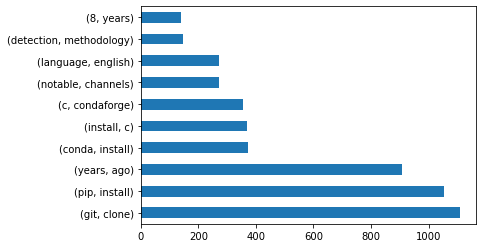

In [384]:
pd.Series(nltk.bigrams(py_words.split())).value_counts().head(10).plot.barh()

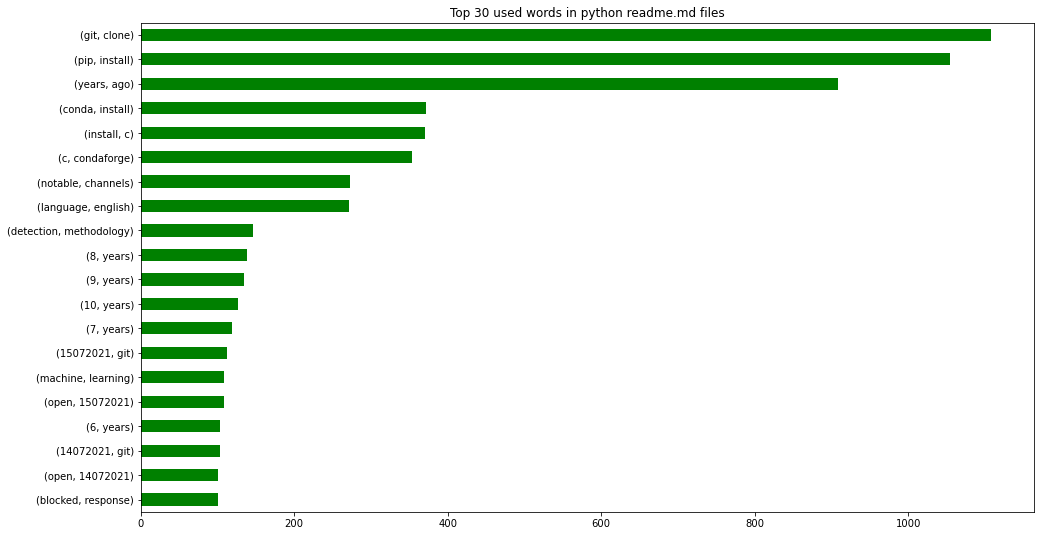

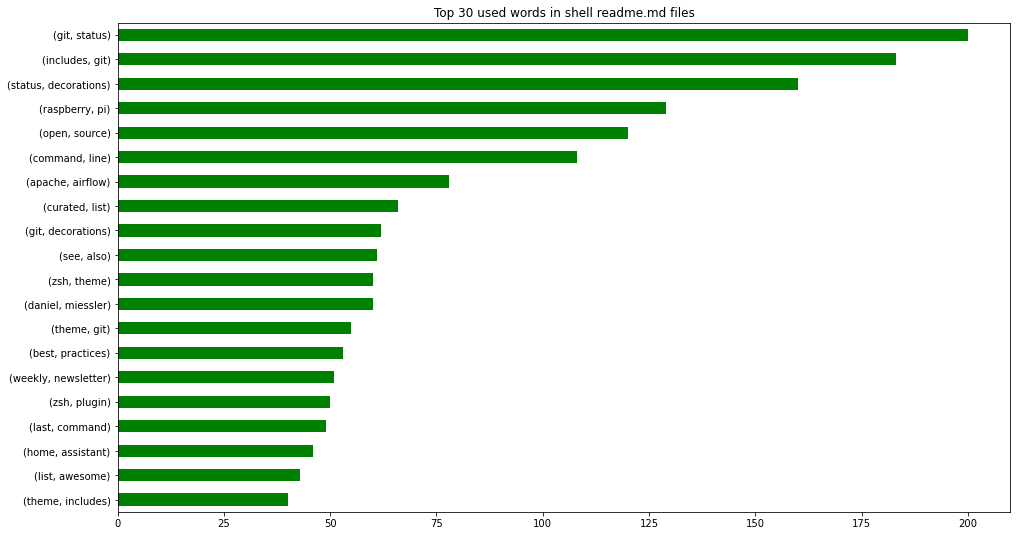

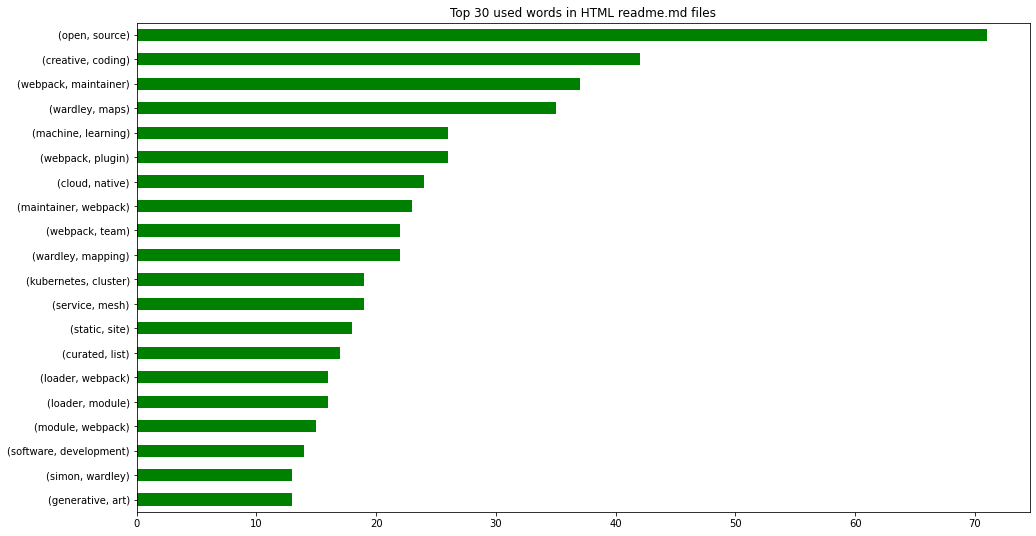

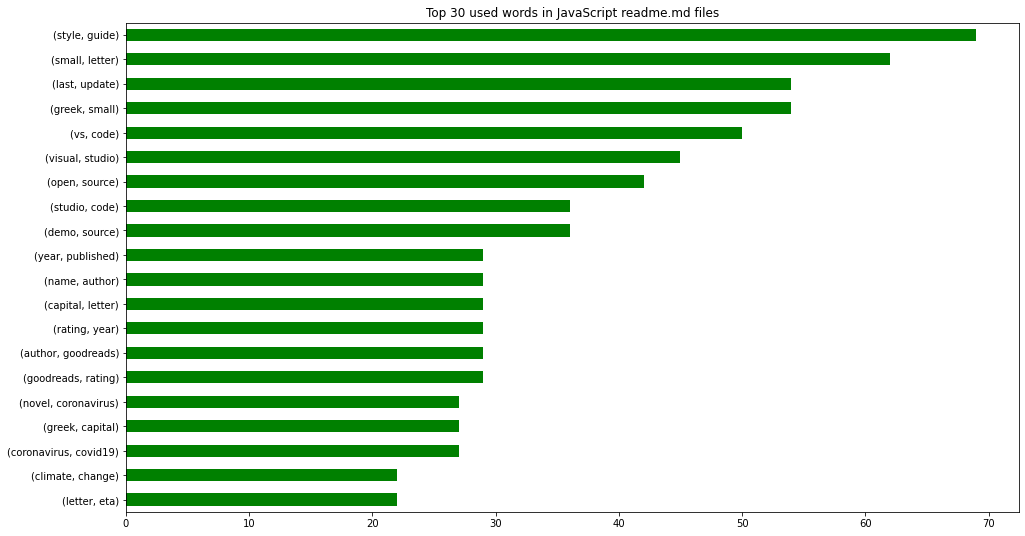

In [385]:
lang_words = {'python':py_words,
              'shell':shell_words,
              'HTML':html_words,
              'JavaScript':js_words}
for key, value in lang_words.items():
    plt.figure(figsize=(16, 9), )
    pd.Series(nltk.bigrams(value.split())).value_counts(ascending = True).tail(20).plot.barh(color = 'green')
    plt.title(f'Top 30 used words in {key} readme.md files')
    plt.show()

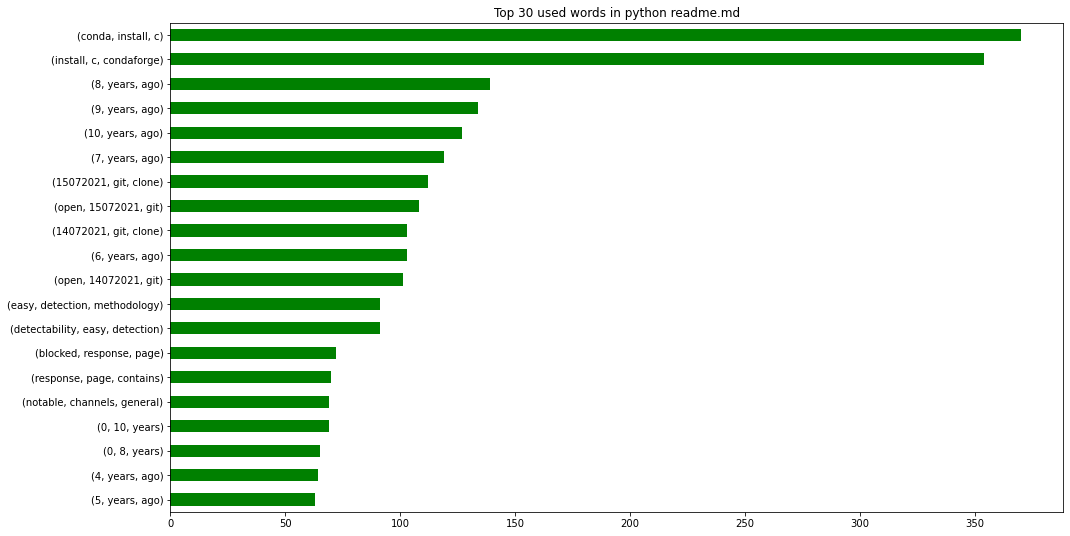

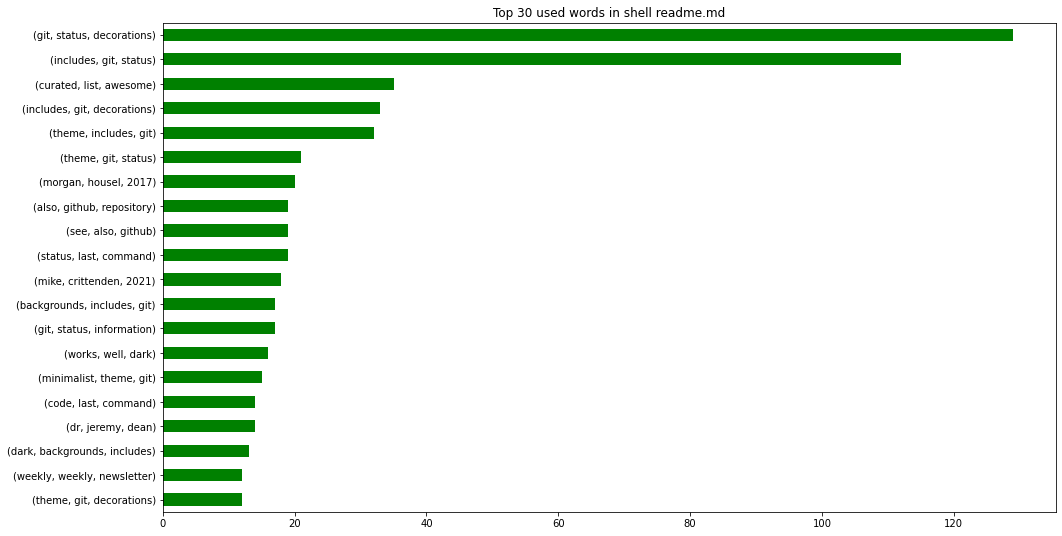

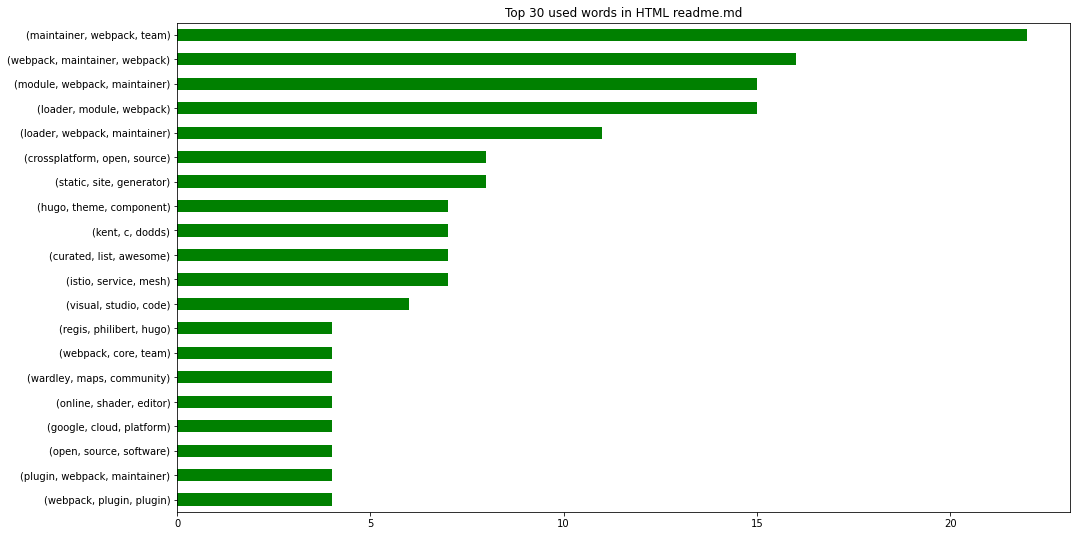

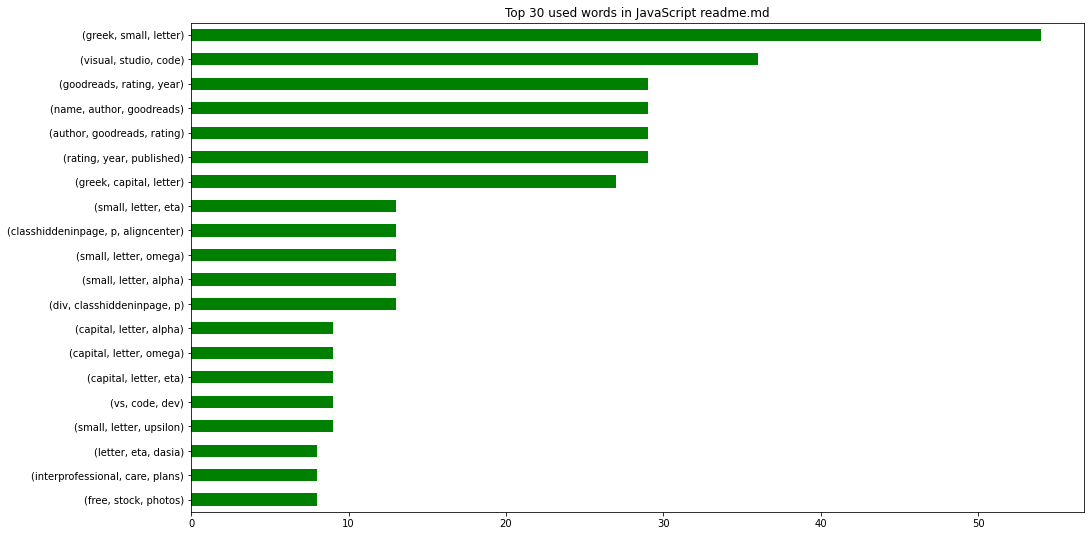

In [386]:
lang_words = {'python':py_words,
              'shell':shell_words,
              'HTML':html_words,
              'JavaScript':js_words}
for key, value in lang_words.items():
    plt.figure(figsize=(16, 9))
    pd.Series(nltk.trigrams(value.split())).value_counts(ascending = True).tail(20).plot.barh(color = 'green')
    plt.title(f'Top 30 used words in {key} readme.md')
    plt.show()

In [387]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 140
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(80, 200)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

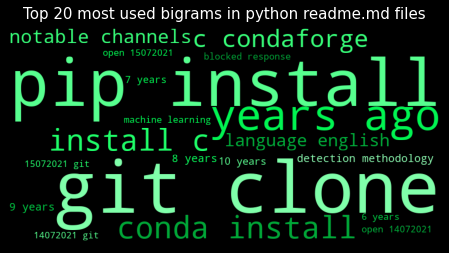

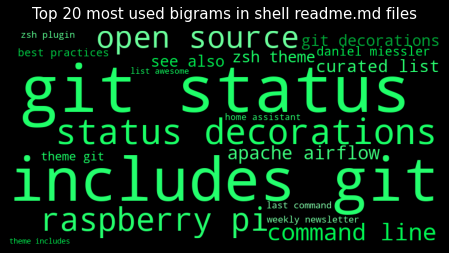

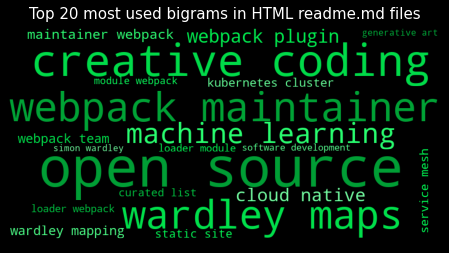

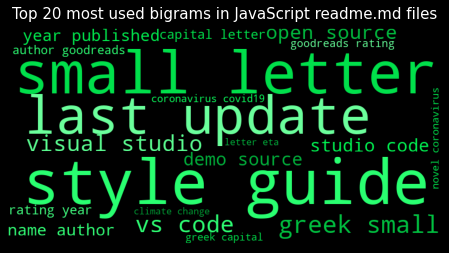

In [388]:
from wordcloud import WordCloud
for key, value in lang_words.items():
    data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(value.split()))\
                                                       .value_counts().head(20)\
                                                       .to_dict().items()}
    img = WordCloud(background_color= None, 
                    width=800, 
                    height=400, 
                    mode = 'RGBA', 
                    color_func = random_color_func,
                    max_words = 20).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4), edgecolor = 'black', facecolor = 'black')
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top 20 most used bigrams in {key} readme.md files', pad = 10, fontdict ={'fontsize':  15, 'color': 'white'})
    plt.show()

In [389]:
pd.Series(nltk.bigrams(value.split())).value_counts(ascending = True).tail(20)

(letter, eta)             22
(climate, change)         22
(coronavirus, covid19)    27
(greek, capital)          27
(novel, coronavirus)      27
(goodreads, rating)       29
(author, goodreads)       29
(rating, year)            29
(capital, letter)         29
(name, author)            29
(year, published)         29
(demo, source)            36
(studio, code)            36
(open, source)            42
(visual, studio)          45
(vs, code)                50
(greek, small)            54
(last, update)            54
(small, letter)           62
(style, guide)            69
dtype: int64

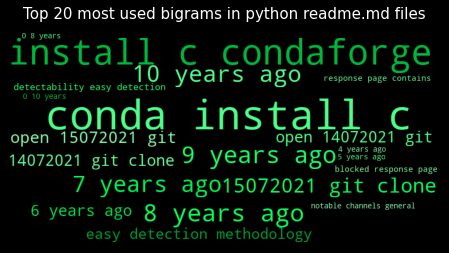

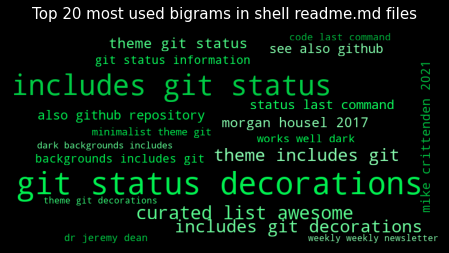

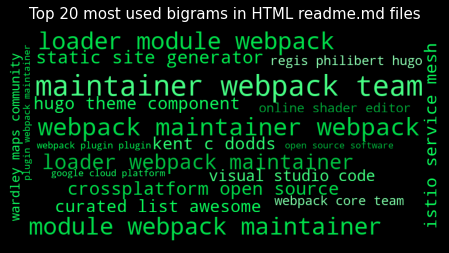

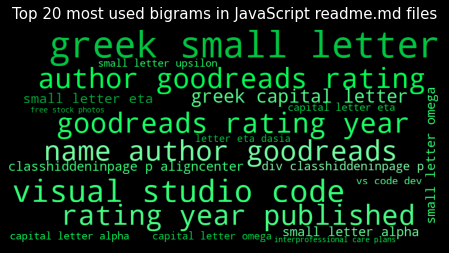

In [390]:
for key, value in lang_words.items():
    data = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(value.split()))\
                                                       .value_counts().head(20)\
                                                       .to_dict().items()}
    img = WordCloud(background_color= None, 
                    width=800, 
                    height=400, 
                    mode = 'RGBA', 
                    color_func = random_color_func,
                    max_words = 20).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4), edgecolor = 'black', facecolor = 'black')
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top 20 most used bigrams in {key} readme.md files', pad = 10, fontdict ={'fontsize':  15, 'color': 'white'})
    plt.show()

## Now Vogue: Modeling 

In [550]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix


In [551]:
# Setup our X variables
X_train = train.lemmatized_readme_contents
X_validate = validate.lemmatized_readme_contents
X_test = test.lemmatized_readme_contents

# Setup our y variables
y_train = train.language
y_validate = validate.language
y_test = test.language

In [552]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [553]:
from imblearn.under_sampling import NearMiss

In [554]:
le = LabelEncoder()

In [555]:
le.fit_transform(y_train)

array([0, 0, 0, 3, 2, 2, 2, 1, 3, 3, 1, 2, 2, 0, 0, 0, 1, 1, 3, 3, 1, 2,
       0, 2, 3, 2, 3, 1, 2, 3, 1, 2, 1, 1, 0, 0, 2, 3, 3, 3, 2, 2, 2, 1,
       0, 3, 0, 1, 2, 3, 3, 3, 3, 0, 1, 1])

In [556]:
X_train.head()

86     english polish english internet franklin devhe...
61     beginnersintermediates generative articulated ...
73     ic intends trick ic tidbit hwinfo pcaps toolsa...
112    5g 5g awesometelco telco umts gsms uecpe ran n...
43     waf firewall wafs wa wafs opensourcing researc...
Name: lemmatized_readme_contents, dtype: object

In [558]:
train.language.value_counts()

Shell         16
Python        15
JavaScript    13
HTML          12
Name: language, dtype: int64

In [559]:
train['baseline'] = 'Shell'

In [560]:
baseline = (train.baseline == y_train).mean()
baseline

0.2857142857142857

In [561]:
#Create the tfidf vectorizer object
tfidf = TfidfVectorizer()

#Fit the object on the training data
tfidf.fit(X_train)

#Use the object
X_train_vectorized =tfidf.transform(X_train)
X_validate_vectorized =tfidf.transform(X_validate) 
X_test_vectorized =tfidf.transform(X_test)

In [562]:
undersample = NearMiss(version=2)
# transform the dataset
X_train_vectorized, y_train_vectorized = undersample.fit_resample(X_train_vectorized, le.fit_transform(y_train))

In [563]:
X_train_vectorized.shape

(48, 30689)

In [564]:
#Create the RF object
rf = RandomForestClassifier(class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

#Fit the RF object to the training data
rf.fit(X_train_vectorized, y_train_vectorized)

#Predict on y
y_pred = rf.predict(X_train_vectorized)

#Evaluate
print(classification_report(y_train_vectorized, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62        12
           1       1.00      0.08      0.15        12
           2       0.75      1.00      0.86        12
           3       0.91      0.83      0.87        12

    accuracy                           0.69        48
   macro avg       0.79      0.69      0.63        48
weighted avg       0.79      0.69      0.63        48



In [565]:
y_pred

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3])

In [566]:
y_pred = rf.predict(X_validate_vectorized)
print(classification_report(le.fit_transform(y_validate), y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.33      0.67      0.44         6
           1       0.00      0.00      0.00         6
           2       0.38      0.50      0.43         6
           3       0.60      0.43      0.50         7

    accuracy                           0.40        25
   macro avg       0.33      0.40      0.34        25
weighted avg       0.34      0.40      0.35        25



In [567]:
#Make the CLF object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=123, min_samples_leaf = 10)

#Fit the model on the training set 
clf = clf.fit(X_train_vectorized, y_train_vectorized)

#Make predictions
y_pred = clf.predict(X_train_vectorized)

#Evaluate model performance on training data
print(classification_report(y_train_vectorized, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.44      0.58      0.50        12
           1       0.70      0.58      0.64        12
           2       0.75      0.75      0.75        12
           3       0.70      0.58      0.64        12

    accuracy                           0.62        48
   macro avg       0.65      0.62      0.63        48
weighted avg       0.65      0.62      0.63        48



In [568]:
y_pred = clf.predict(X_validate_vectorized)

In [569]:
print(classification_report(le.fit_transform(y_validate), y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.13      0.33      0.19         6
           1       0.00      0.00      0.00         6
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00         7

    accuracy                           0.12        25
   macro avg       0.12      0.12      0.10        25
weighted avg       0.11      0.12      0.10        25



In [570]:
from sklearn.naive_bayes import MultinomialNB

In [571]:
#Make the naive bayes object
nb = MultinomialNB()

#Fit the model on the training set 
nb = nb.fit(X_train_vectorized, y_train_vectorized)

#Make predictions
y_pred = nb.predict(X_train_vectorized)

#Evaluate model performance on training data
print(classification_report(y_train_vectorized, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [572]:
y_pred = nb.predict(X_validate_vectorized)
print(classification_report(le.fit_transform(y_validate), y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.00      0.00      0.00         6
           2       0.67      0.67      0.67         6
           3       0.38      0.71      0.50         7

    accuracy                           0.40        25
   macro avg       0.35      0.39      0.35        25
weighted avg       0.35      0.40      0.35        25



In [573]:
from sklearn.svm import SVC

In [577]:
#Make the svc object
svv = SVC()

#Fit the model on the training set 
svc = svc.fit(X_train_vectorized, y_train_vectorized)

#Make predictions
y_pred = svc.predict(X_train_vectorized)

#Evaluate model performance on training data
print(classification_report(y_train_vectorized, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [580]:
y_pred = svc.predict(X_validate_vectorized)
print(classification_report(le.fit_transform(y_validate), y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.27      0.67      0.38         6
           2       1.00      0.17      0.29         6
           3       0.33      0.43      0.38         7

    accuracy                           0.32        25
   macro avg       0.40      0.32      0.26        25
weighted avg       0.40      0.32      0.26        25



In [604]:
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
knn.fit(X_train_vectorized, y_train_vectorized)
y_pred = knn.predict(X_train_vectorized)
print(classification_report(y_train_vectorized, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.64      0.75      0.69        12
           2       1.00      0.83      0.91        12
           3       1.00      0.33      0.50        12

    accuracy                           0.73        48
   macro avg       0.81      0.73      0.71        48
weighted avg       0.81      0.73      0.71        48



In [605]:
y_pred = knn.predict(X_validate_vectorized)
print(classification_report(le.fit_transform(y_validate), y_pred))

              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.40      0.33      0.36         6
           2       0.50      0.83      0.62         6
           3       0.33      0.14      0.20         7

    accuracy                           0.40        25
   macro avg       0.38      0.41      0.37        25
weighted avg       0.38      0.40      0.37        25



# Takeaway from initial modeling

- Random forest classifier worked the best with NearMiss undersampling

In [655]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [668]:
#Create the tfidf vectorizer object
tfidf = TfidfVectorizer()

#Fit the object on the training data
tfidf.fit(X_train)

#Use the object
X_train_vectorized =tfidf.transform(X_train)
X_validate_vectorized =tfidf.transform(X_validate) 
X_test_vectorized =tfidf.transform(X_test)
#oversample = RandomOverSampler(sampling_strategy='auto', random_state = 123)
#smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 2)
undersample = NearMiss(version=2)
# transform the dataset
X_train_vectorized, y_train_vectorized = undersample.fit_resample(X_train_vectorized, le.fit_transform(y_train))

In [669]:
# create KNN classifier object
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')

# fit the model to vectorized data
knn.fit(X_train_vectorized, y_train_vectorized)
y_pred = knn.predict(X_train_vectorized)
print(classification_report(y_train_vectorized, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.64      0.75      0.69        12
           2       1.00      0.83      0.91        12
           3       1.00      0.33      0.50        12

    accuracy                           0.73        48
   macro avg       0.81      0.73      0.71        48
weighted avg       0.81      0.73      0.71        48



In [670]:
y_pred = rf.predict(X_validate_vectorized)
print(classification_report(le.fit_transform(y_validate), y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.33      0.67      0.44         6
           1       0.00      0.00      0.00         6
           2       0.38      0.50      0.43         6
           3       0.60      0.43      0.50         7

    accuracy                           0.40        25
   macro avg       0.33      0.40      0.34        25
weighted avg       0.34      0.40      0.35        25



In [671]:
y_pred = knn.predict(X_test_vectorized)
print(classification_report(le.fit_transform(y_test), y_pred))

              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.40      0.40      0.40         5
           2       0.29      0.33      0.31         6
           3       0.50      0.17      0.25         6

    accuracy                           0.33        21
   macro avg       0.37      0.35      0.33        21
weighted avg       0.37      0.33      0.32        21

